# <center>Laboratorium <br>Metod Numerycznych <br> Całkowanie numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import main
from numpy.polynomial.legendre import leggauss
from scipy.integrate import quad





Całkowanie numeryczne to dziedzina matematyki numerycznej zajmująca się przybliżonym obliczaniem wartości całek matematycznych, zwłaszcza tych, które nie mają rozwiązania analitycznego lub gdy obliczenia analityczne są trudne lub niemożliwe do przeprowadzenia. Całkowanie numeryczne jest szeroko stosowane w praktyce, szczególnie w obszarach takich jak nauki przyrodnicze, inżynieria, ekonometria, czy analiza danych.

Podstawowe metody całkowania numerycznego obejmują:

**Metoda prostokątów**

Metoda prostokątów: Polega na przybliżeniu całki poprzez sumowanie wartości funkcji w punktach lewego brzegu podprzedziałów i pomnożenie tego przez szerokość podprzedziału.

$
\int_{x_0}^{x_n}f(x)dx\approx h\sum_{i=0}^{n-1}f(x_i)
$

gdzie:
$
h = \frac{x_n-x_0}{n}
$

**Metoda trapezów**

Metoda trapezów: Podobnie jak metoda prostokątów, ale używa trapezów zamiast prostokątów. Jest bardziej dokładna dla funkcji, które nie są zupełnie równoległe osi x.

$
\int_{x_0}^{x_n}f(x)dx\approx \sum_{i=0}^{n-1}\frac{h}{2}(f(x_{i+1})+f(x_i))
$

***Zadanie 1.***

Zaimplementuj metodę prostokątów oraz metodę trapezów w pliku main zgodnie z opisem.

Zobrazuje działanie napisanych metod na przykładzie prostego przykładu: obliczenia całki z x na przedziale [1, 2], czyli w pamięci możemy obliczyć jaki powinien być wynik: 1,5


In [2]:
def dummy(x):
    return x

def rectangular_rule(func, a, b, n):
    try:
        h = (b-a)/n
        sum = 0
        x = np.linspace(a, b, n)
        for i in range(0, n-1):
            sum += func(x[i])
        return h*sum
    except(ValueError, TypeError):
        return None

print("Wynik obliczania całki metodą prostokątów")
print(rectangular_rule(dummy, 1, 2, 1000))


def trapezoidal_rule(func, a, b, n):
    try:
        h = (b-a)/n
        sum = 0
        while a<b:
            sum += h/2*(func(a+h)+func(a))
            a+=h
        return sum
    except(ValueError, TypeError):
        return None
print("Wynik obliczania całki metodą trapezów")
print(trapezoidal_rule(dummy, 1, 2, 1000))


Wynik obliczania całki metodą prostokątów
1.4980000000000002
Wynik obliczania całki metodą trapezów
1.5020004999999452


***Zadanie 2.***

Wyznacz numerycznie wartość całki:   
$$
\int\limits_{a}^{b}\log(1+\tan(x))dx 
$$

Wykonaj następujące czynności:

1. Czy możliwe jest całkowanie podanej funkcji na dowolnym przedziale? Swoją odpowiedź uzasadnij.
2. Oblicz całkę numerycznie na przedziale $a =0$, $b=\cfrac{\pi}{4}$ przy pomocy następujących metod zaimplementowanych w zadaniu 1  


In [3]:
def zad2_fun(x):
    return np.log(1+np.tan(x))
print(rectangular_rule(zad2_fun, np.pi/2, np.pi/4, 100))
print(rectangular_rule(zad2_fun, 0, np.pi/4, 100))
print(trapezoidal_rule(zad2_fun, 0, np.pi/4, 100))


-1.440542621267482
0.26675429606219125
0.2776731914228737


Nie możemy obliczyć całki na przedziale, który jest równy pi/2, ponieważ dla tej wartości tangens jest równy nieskończoność i pojawiają się błędy.

***Zadanie 3.***

Dla funkcji 

$$f(x) = e^{x^2}$$

wyznacz numerycznie wartośc całki na przedziale $a = 0$, $b=1$  w  taki sam sposób jak w zadaniu 2.



In [34]:
def zad3_fun(x):
    return np.exp(x**2)
print(f"Wynik całkowania metodą prostokątów:")
print(rectangular_rule(zad3_fun, 0, 1, 100))

print(f"Wynik całkowania metodą trapezów:")
print(trapezoidal_rule(zad3_fun, 0, 1, 100))

Wynik całkowania metodą prostokątów:
1.4394795808479974
Wynik całkowania metodą trapezów:
1.4626970498492728


***Zadanie 4.***

Dane są funkcje:

$$f(x) = e^{-x^2}$$

$$g(x) = \frac{1}{x^2+4}$$


Napisz funkcję całkującą *custom_integration*, która wykorzystuje kwadraturę Gaussa-Legendre'a zaimplementowaną w bibliotece numpy.polynomial.legendre. Funkcja powinna przyjmować funkcję do zintegrowania, przedział całkowania oraz rząd kwadratury. Przedział ten zostanie przeskalowany do standardowego przedziału (-1, 1) używając wag i węzłów uzyskanych z funkcji leggauss. Następnie funkcja powinna obliczyć wartość całki przy użyciu kwadratury Gaussa-Legendre'a.

W celu oceny dokładności metody, należy porównać wyniki uzyskane za pomocą tej funkcji z wynikami uzyskanymi za pomocą metody trapezów (np.trapz) na wybranych funkcjach na różnych przedziałach. Równocześnie, należy analizować, jak błąd całkowania zmienia się wraz ze wzrostem rzędu kwadratury. Do tego celu należy użyć funkcji semilogy z biblioteki matplotlib w celu stworzenia wykresu w skali logarytmicznej.




Wstępne testy
0.7463933075844109
0.7468180014679695
0.7468241328124272
0.2297548930530768
0.2318231378321363
0.231823804500403
Wartości kwadratury:
[1, 5, 10, 15, 20, 25, 30, 35, 40]


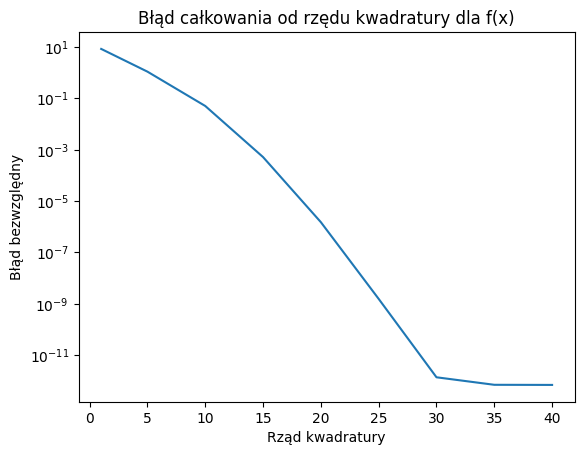

Text(0.5, 1.0, 'Błąd całkowania od rzędu kwadratury dla g(x)')

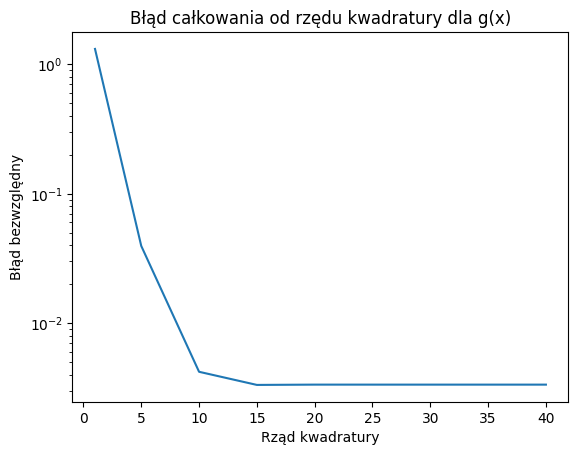

In [35]:
def f(x):
    return np.exp(-(x**2))
def g(x):
    return 1/(x**2 + 4)

print('Wstępne testy')
print(rectangular_rule(f, 0, 1, 1000))
print(trapezoidal_rule(f, 0, 1, 100))
print(main.custom_integration(f, 0, 1, 100))

print(rectangular_rule(g, 0, 1, 100))
print(trapezoidal_rule(g, 0, 1, 100))
print(main.custom_integration(g, 0, 1, 100))

a = -2
b = 2
n = 100
a = [-3,-2,-1]
b = [3,2,5]

errors = []
a1 = -5
b1 = 5
# order = np.linspace(5, 45, 9)
print('Wartości kwadratury:')
kw = [1,5,10,15,20,25,30,35,40]
print(kw)

for i in kw:
    res_custom = main.custom_integration(f,a1,b1,i)
    res_trapezoidal = main.trapezoidal_rule(f,a1,b1,n)
    errors.append(abs(res_custom - res_trapezoidal))
    
plt.semilogy(kw, errors)
plt.xlabel('Rząd kwadratury')
plt.ylabel('Błąd bezwzględny')
plt.title('Błąd całkowania od rzędu kwadratury dla f(x)')
plt.show()

errors = []   

for i in kw:
    res_custom = main.custom_integration(g,a1,b1,i)
    res_trapezoidal = main.trapezoidal_rule(g,a1,b1,n)
    errors.append(abs(res_custom - res_trapezoidal))
    
plt.semilogy(kw, errors)
plt.xlabel('Rząd kwadratury')
plt.ylabel('Błąd bezwzględny')
plt.title('Błąd całkowania od rzędu kwadratury dla g(x)')

***Zadanie 5***


Wyznacz wartość całki wykorzystując funkcje z *zadania 4* oraz całkowanie adaptacyjne (jest to funkcja *scipy.integrate.quad*).

Zbadaj jak zmienia się błąd całkowania zmieniając błąd względny i bezwzględny w funkcji *quad*. Wybierz 10 różnych wartości.

Utwórz wykres błędu całki w zależności od liczby wywołań funkcji podcałkowej. Liczba wywołań jest w argumencie wyjściowym infodict jako 'neval'.

Wynik obliczenia za pomocą quad: 0.13525725794999466
Błąd wynikający z obliczenia za pomocą quad: 1.5016572202374808e-15


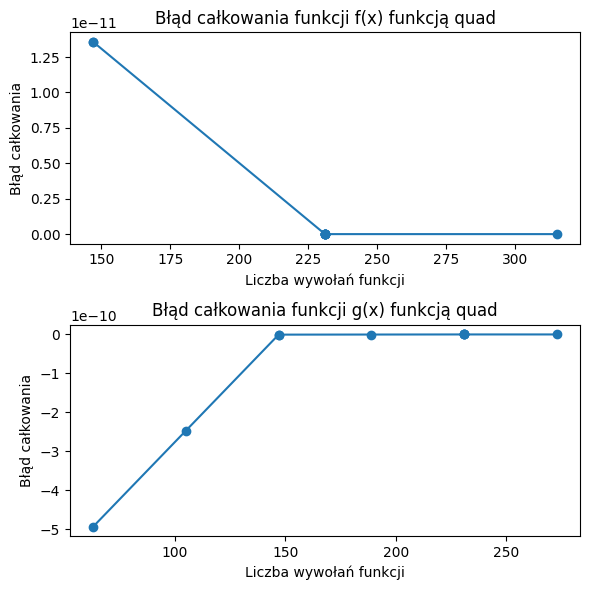

In [40]:
def f(x):
    return np.exp(-(x**2))
def g(x):
    return 1/(x**2 + 4)

test = quad(f, 1, 2)
print(f"Wynik obliczenia za pomocą quad: {test[0]}")
print(f"Błąd wynikający z obliczenia za pomocą quad: {test[1]}")

results = []
relative_errors = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11]
absolute_errors = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11]

errors_quad_f = []
errors_quad_g = []
neval_quad_f = []
neval_quad_g = []
a, b = -15, 15

for abs_err, rel_err in zip(absolute_errors, relative_errors):
    result, info,infodict = quad(f, a, b, epsabs=abs_err, epsrel=rel_err, full_output=True)
    errors_quad_f.append(result - quad(f, a, b)[0])
    neval_quad_f.append(infodict['neval'])


for abs_err, rel_err in zip(absolute_errors, relative_errors):
    result, info,infodict = quad(g, a, b, epsabs=abs_err, epsrel=rel_err, full_output=True)
    errors_quad_g.append(result - quad(g, a, b)[0])
    neval_quad_g.append(infodict['neval'])

plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
plt.plot(neval_quad_f, errors_quad_f, 'o-')
plt.title('Błąd całkowania funkcji f(x) funkcją quad')
plt.xlabel('Liczba wywołań funkcji')
plt.ylabel('Błąd całkowania')

plt.subplot(2, 1, 2)
plt.plot(neval_quad_g, errors_quad_g, 'o-')
plt.title('Błąd całkowania funkcji g(x) funkcją quad')
plt.xlabel('Liczba wywołań funkcji')
plt.ylabel('Błąd całkowania')
plt.tight_layout()

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)